In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2
import scipy.signal

# Introduction to image processing

## Images in the computer

* 2 dimensional arrays usually recorded by CMOS or CCD matrix
* Colors are represented by multiple channels (layers) of 2D arrays

## Color images for human vision

* Follow color sensitivity of human eye
* Red - Green - Blue "channels"
* Large overlap between channels has consequences regarding color vision

<img src="human.png" style="width:50%; margin: auto">

## Color digital cameras

Try to achieve coverage close to human eye

* Bayer filter response functions
* CMOS sensor quantum efficiency

<img src="bayer.png" style="width:20%; margin: auto">
<img src="canon.png" style="width:50%; margin: auto">

## RGB displays

* Additive color mixing technique
* (As opposed to print which uses subtractive, hence CMYK colors)
* Three different color filter, OLED pixel, phosphor etc.
* sRGB, Adobe RGB etc. define the three base colors and their intended spectra

<img src="samsung.png" style="width:50%; margin: auto">

## CIE 1931 chromacity diagrams

* Graphical representation of human eye color sensitivity

<img src="cie_blackbody.jpg" style="width:50%; margin: auto">

* Narrow-band emitters can only cover their **convex hull** in color space
* This is called the **color gamut**
* Black curve: color gamut of _any_ reflective surface, i.e. paper
* White curve: color gamut of an sRGB display

<img src="cie_srgb.jpg" style="width:50%; margin: auto">

## White balance

* A perfectly white paper reflects all wavelengths of the sunlight equally
* But what if the light source is not the sun?
* Have to correct color channels accordingly

# Working with color images

Load a single image with JPEG compression

In [3]:
img = imread('garden.jpg')

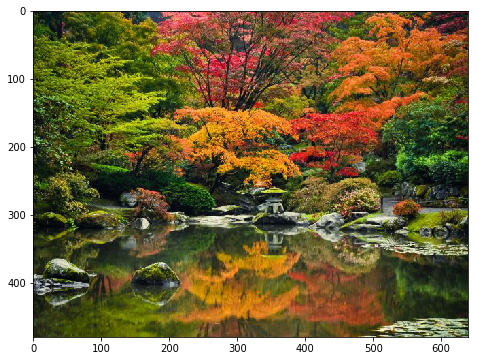

In [4]:
f = plt.figure(figsize=(10, 6))
plt.imshow(img)

In [5]:
img.shape

(480, 640, 3)

The `img` variable is a numpy array, the dimensions are:

* pixel rows (image height)
* pixel columns (image width)
* color channels

The pixel values 

* uint8 between 0 (black) and 255 (full intensity R, G or B)
* monitors need to be calibrated to account for color pixel spectrum
* white is 255, 255, 255 by definition
* for any gray, R, G and B must be equal

In [6]:
img[0:10,0:10,0]

array([[34, 16,  0,  1, 13, 24, 39, 50, 49, 40],
       [29, 15,  0,  0, 10, 17, 20, 19, 37, 46],
       [31, 17,  1,  0,  3, 14, 14,  7, 14, 42],
       [30, 25, 13,  2,  3, 10,  9,  1,  0, 26],
       [23, 30, 28, 15,  7,  8,  8,  4,  6, 15],
       [29, 33, 30, 14,  4, 12, 34, 52, 25, 14],
       [32, 33, 28, 15,  7, 21, 57, 91, 33, 13],
       [26, 30, 34, 30, 22, 23, 50, 80, 27,  9],
       [10, 30, 42, 89, 48, 45, 46, 58, 22,  5],
       [ 2, 16, 31, 64, 54, 43, 50, 58, 50, 20]], dtype=uint8)

## RGB channels

The actual order of channels is BGR.

Individual channels don't look nice as B&W images, need _combination_ of channels to make something that looks like traditional B&W photos, c.f. panchromatic photographic film.

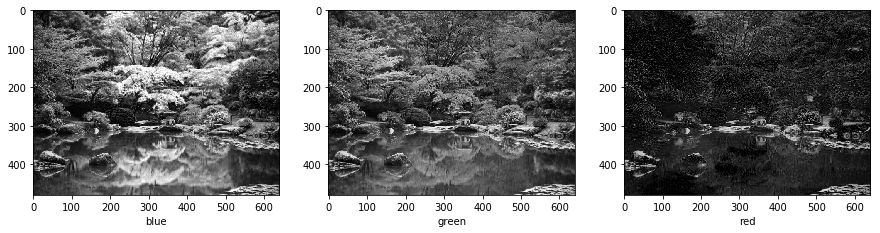

In [7]:
colors = ('blue', 'green', 'red')
f, axs = subplots(1, 3, figsize=(15, 6))
for i in range(0, 3):
    axs[i].imshow(img[:,:,i], cmap='gray')
    axs[i].set_xlabel(colors[i])

## Pixel value histograms

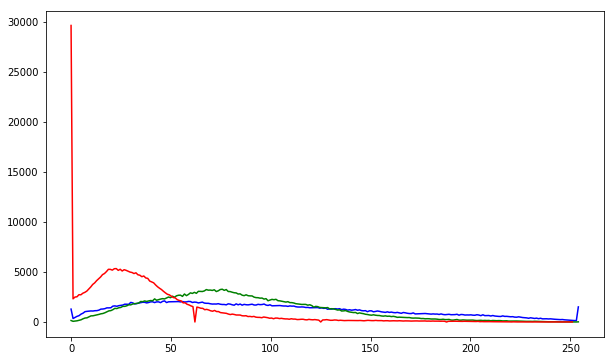

In [9]:
f = plt.figure(figsize=(10, 6))

for i in range(0, 3):
    hist, bins = np.histogram(img[:,:,i], bins=256)
    plot(bins[:-1], hist, '-', color=colors[i])

## Histogram equalization is necessary for a nice image

* to fill dynamic range of display
* correct for any white balance issues originating from illumination

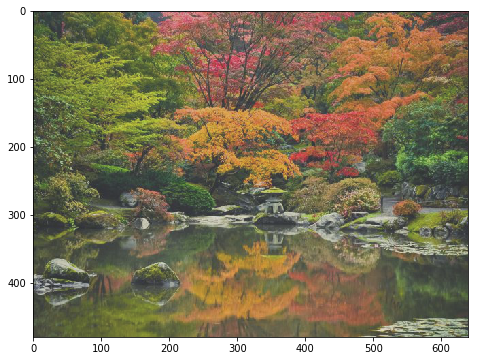

In [10]:
# We mimic an unequalized image here
f = plt.figure(figsize=(10, 6))
plt.imshow(np.uint8(50 + img / 1.5))

## HSV color space

Due to the "leaks" in human color receptors, we see the color wheel

<img src="hsv_1.png" style="width:30%; margin: auto">

RGB value can be converted into HSV values without losing information

<img src="hsv_2.png" style="width:50%; margin: auto">

Text(0.5, 0, 'value')

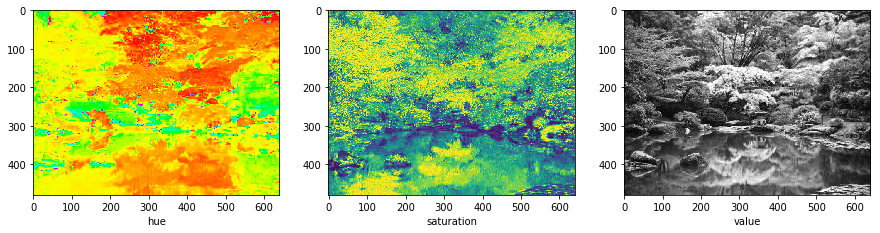

In [10]:
colors = ('hue', 'saturation', 'value')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
f, axs = subplots(1, 3, figsize=(15, 6))

axs[0].imshow(uint8((128-hsv[:,:,0]) % 256), cmap='hsv', vmin=0, vmax=255)
axs[0].set_xlabel(colors[0])

axs[1].imshow(hsv[:,:,1], cmap='viridis')
axs[1].set_xlabel(colors[1])
    
axs[2].imshow(hsv[:,:,2], cmap='gray')
axs[2].set_xlabel(colors[2])

## Fun: rotating the color wheel

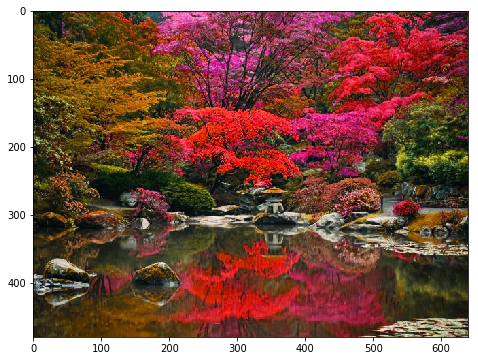

In [11]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,0] = uint8((hsv[:,:,0] + 16) % 256)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
f = plt.figure(figsize=(10, 6))
imshow(bgr)

## Desaturating an image

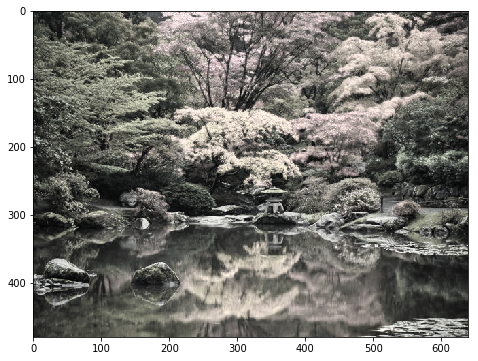

In [12]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,1] //= 8
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
f = plt.figure(figsize=(10, 6))
imshow(bgr)

# Working with B&W images

## The pixel value histogram

In [13]:
img = imread('woman.jpg')[:,:,0]

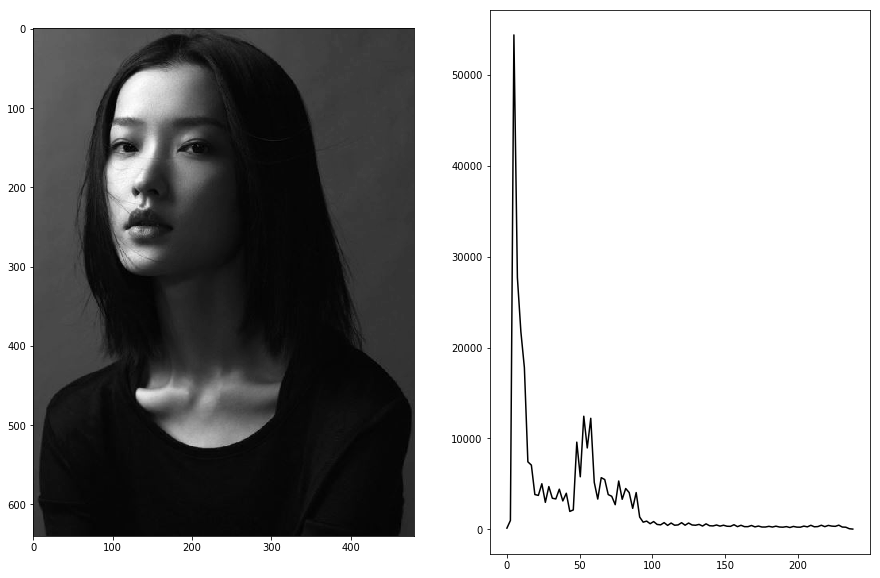

In [14]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(img, cmap='gray')

hist, bins = np.histogram(img, bins=100)
axs[1].plot(bins[:-1], hist, '-k')

## Gamma correction

Power-law transformation of the pixel value scale

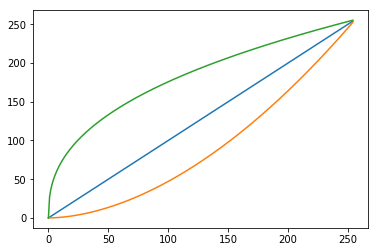

In [34]:
xx = np.arange(0, 255)
plt.plot(xx,xx)
plt.plot(xx,256 * (xx / 256)**1.8)
plt.plot(xx,256 * (xx / 256)**0.4)

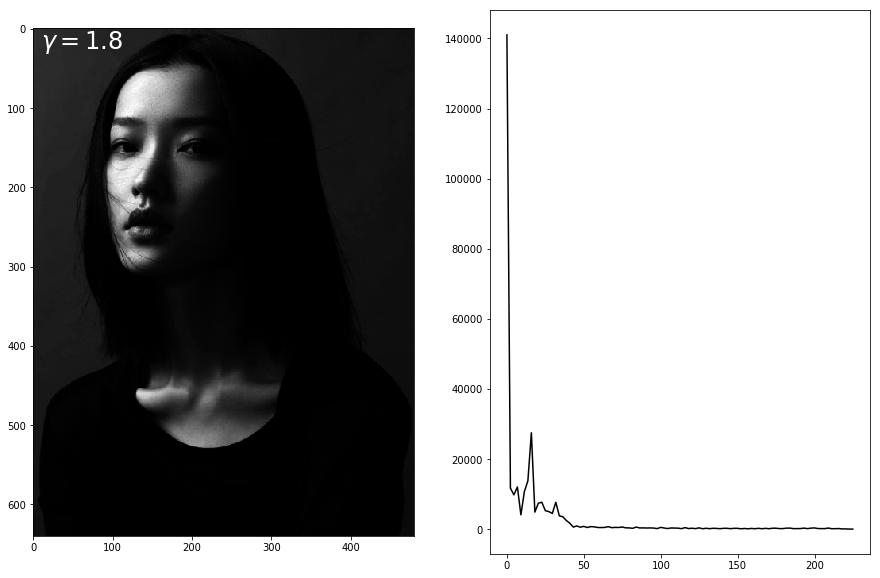

In [42]:
gg = uint8(256 * (img / 256)**1.8)

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(gg, cmap='gray')
axs[0].text(10, 25, "$\gamma = 1.8$", color='white', fontsize=24)

hist, bins = np.histogram(gg, bins=100)
axs[1].plot(bins[:-1], hist, '-k')

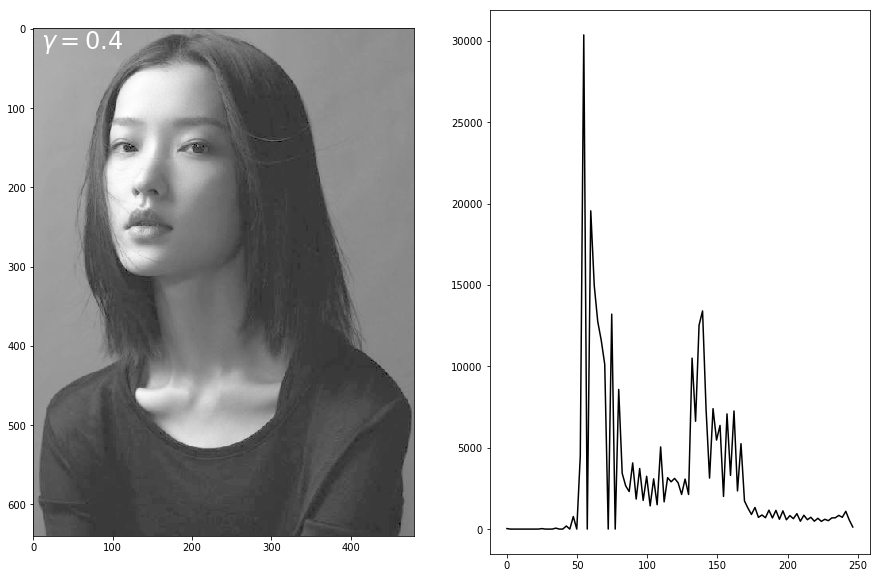

In [43]:
gg = uint8(256 * (img / 256)**0.4)

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(gg, cmap='gray')
axs[0].text(10, 25, "$\gamma = 0.4$", color='white', fontsize=24)

hist, bins = np.histogram(gg, bins=100)
axs[1].plot(bins[:-1], hist, '-k')

## Thresholding

Limit pixel values to a certain interval

* Technique also works for color images, especially in HSV representation

/usr/local/miniconda3/envs/user/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((640, 480), 0) will return an array of dtype('uint8')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


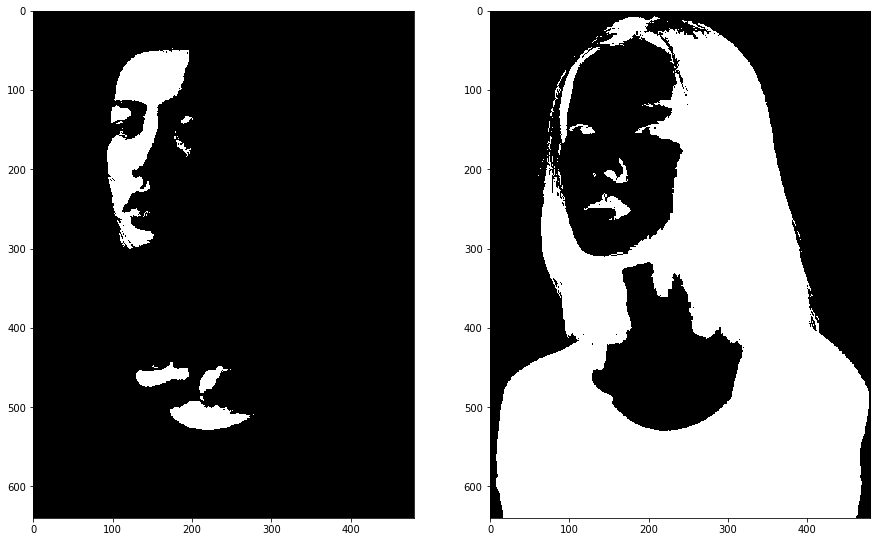

In [15]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

lim1 = np.full(img.shape, uint8(0))
lim1[(img > 128)] = uint8(255)
axs[0].imshow(lim1, cmap='gray')

lim2 = np.full(img.shape, uint8(0))
lim2[(img < 30 )] = uint8(255)
axs[1].imshow(lim2, cmap='gray')

## Erosion and dilation

/usr/local/miniconda3/envs/user/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3, 3), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


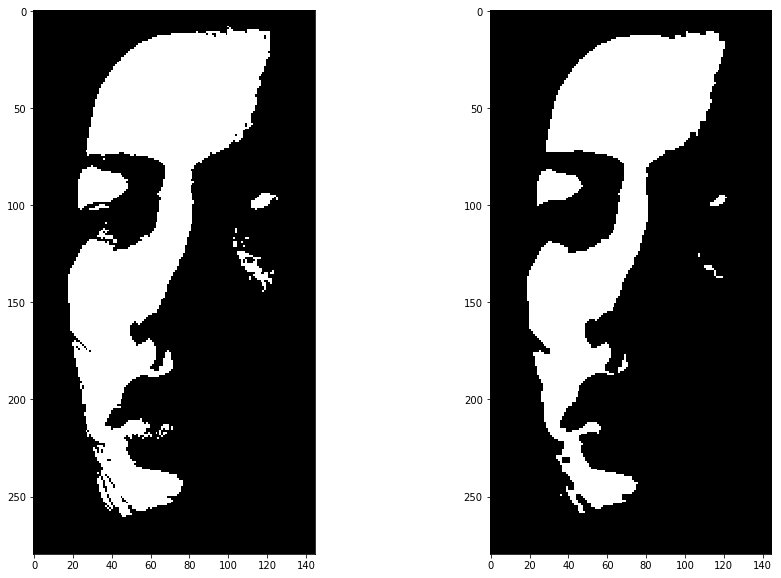

In [16]:
zoom = lim1[40:320,75:220]

f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(zoom, cmap='gray')

kernel = np.full((3,3), 1)
er = cv2.erode(zoom, kernel, 1)
axs[1].imshow(er, cmap='gray')

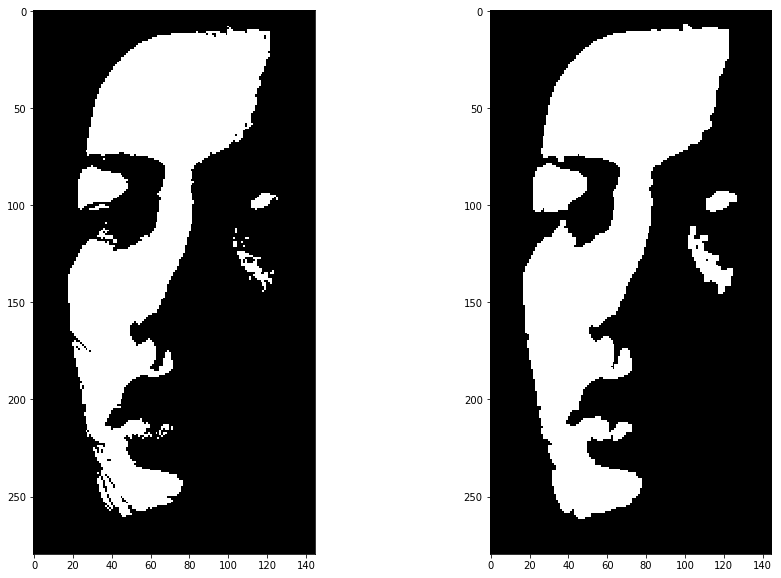

In [17]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(zoom, cmap='gray')

kernel = np.full((3,3), 1)
dil = cv2.dilate(zoom, kernel, 1)
axs[1].imshow(dil, cmap='gray')

## The difference of the two: simple edge detection

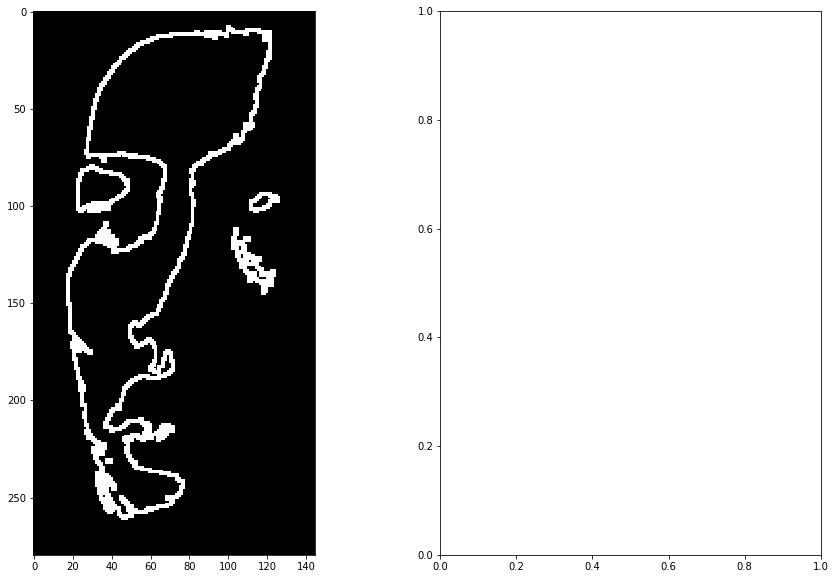

In [18]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(uint8(dil - er), cmap='gray')

## Find connected components

* nlabel: number of diffent connected components
* labels: id of component for each pixel of original image
* stats: some statistics of each component, i.e. number of pixels, width, height etc.
* centroids: center of each component

In [19]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(uint8(dil))

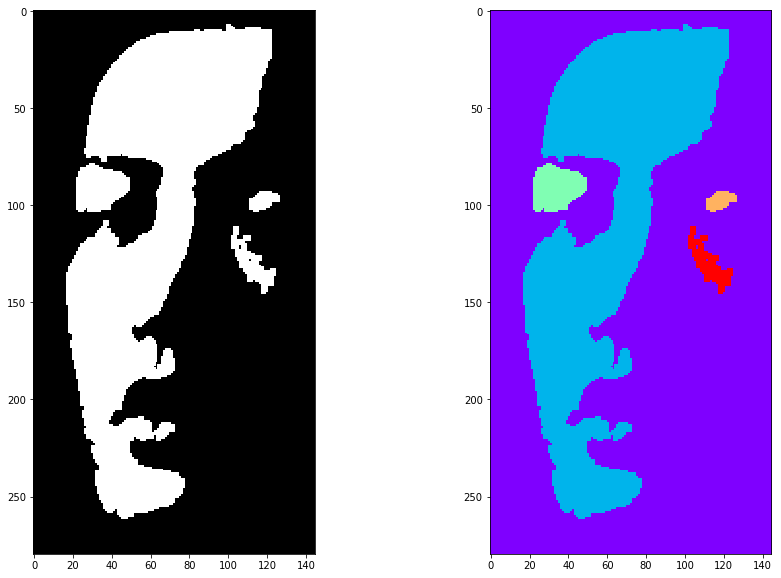

In [20]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(dil, cmap='gray')
axs[1].imshow(labels, cmap='rainbow')

# Convolution with 2D kernels

Can be used to blur image, find edges, etc.

## Blur image using boxcar kernel

/usr/local/miniconda3/envs/user/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((5, 5), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


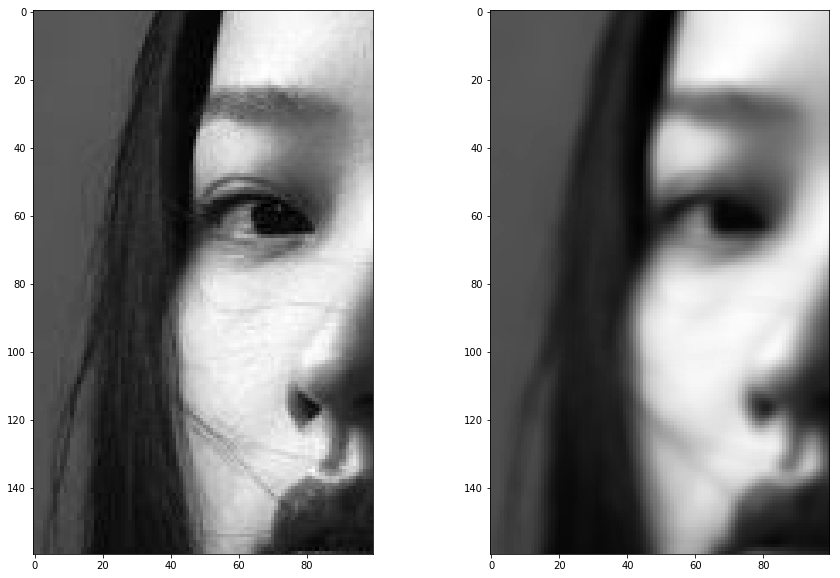

In [21]:
k = np.full((5,5), 1)
k /= np.sum(k)

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].imshow(cnv[90:250,50:150], cmap='gray')

## Unsharp masking

Convolving with a boxcar kernel basically acts as a simple lowpass filter: removes high frequency components of the image

Subtracting blurred image from the original should keep the high frequency components, i.e. works like a high pass filter and effectively sharpens the image.

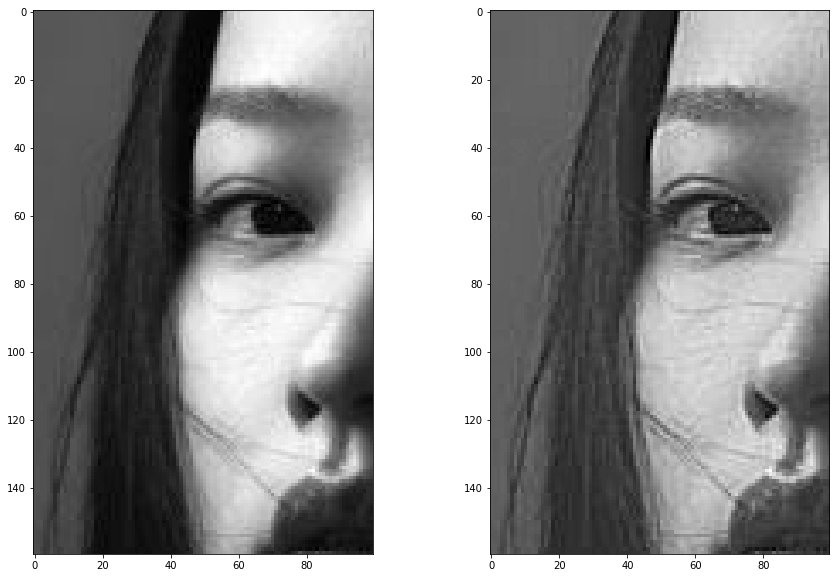

In [22]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].imshow(img[90:250,50:150] - 0.5 * cnv[90:250,50:150], cmap='gray')

## Detect edges with directional kernels

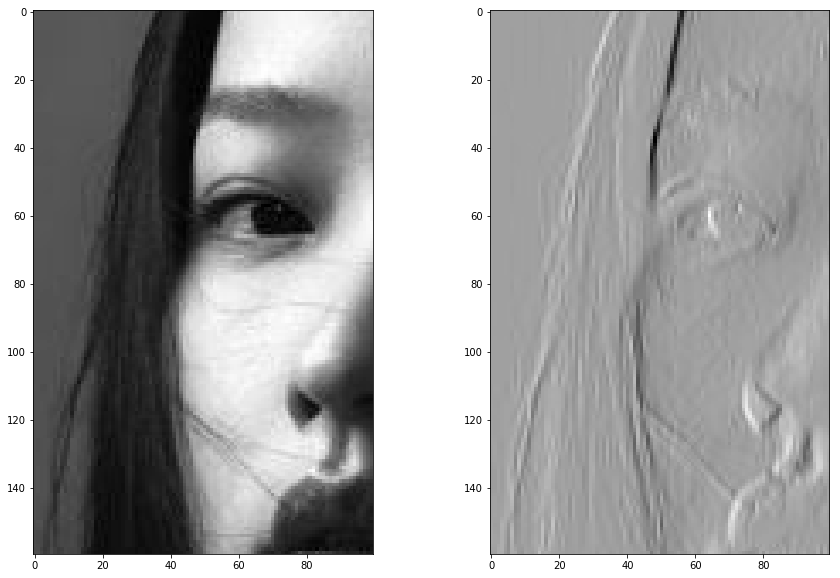

In [23]:
k = np.array([[-1, 1], [-1, 1], [-1, 1]], dtype=np.double)

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].imshow(cnv[90:250,50:150], cmap='gray')

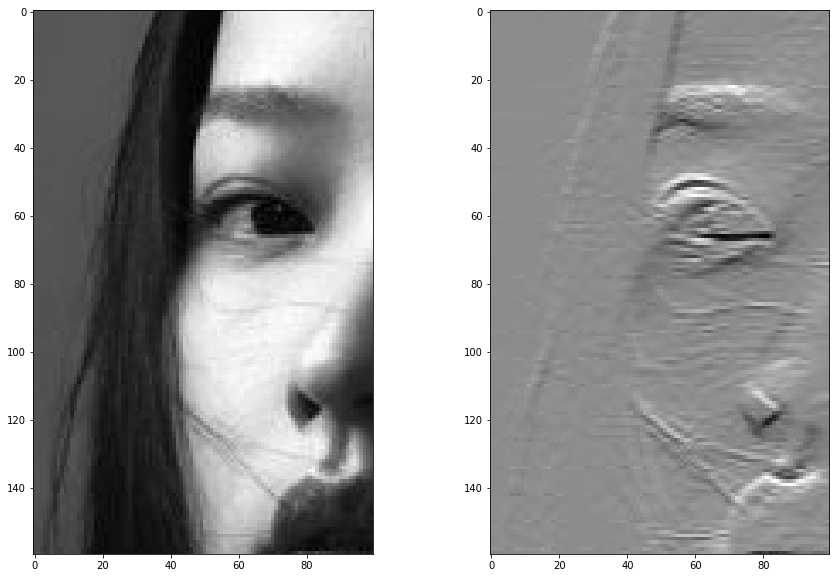

In [24]:
k = np.array([[-1, -1, -1], [1, 1, 1]], dtype=np.double)

cnv = scipy.signal.convolve2d(img, k, mode='same')

f, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(img[90:250,50:150], cmap='gray')
axs[1].imshow(cnv[90:250,50:150], cmap='gray')